<a href="https://colab.research.google.com/github/ASWINR341/pytorch_project/blob/main/rice_tabular_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")
# 076a0db856c0b25379892f52097864dc

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis =1, inplace=True)
print(data_df.shape)

(18185, 11)


In [ ]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [ ]:
original_df = data_df.copy()

for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3)

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape)

(12729, 10) (3819, 10) (1637, 10)


In [ ]:
class dataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype=torch.float32).to(device)
    self.y = torch.tensor(y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [ ]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size = 8, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size = 8, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size = 8, shuffle=True)


In [ ]:
for x, y in train_dataloader:
  print(x)
  print("=====")
  print(y)
  break

tensor([[0.6158, 0.8742, 0.6188, 0.9804, 0.5877, 0.7847, 0.6993, 0.7023, 0.6846,
         0.8016],
        [0.7099, 0.7825, 0.7931, 0.9202, 0.6843, 0.8426, 0.7996, 0.7010, 0.7922,
         0.5597],
        [0.5922, 0.6018, 0.8647, 0.7883, 0.5599, 0.7695, 0.7411, 0.5868, 0.9430,
         0.3949],
        [0.8129, 0.8384, 0.8431, 0.9221, 0.7690, 0.9016, 0.8799, 0.7178, 0.8653,
         0.5642],
        [0.7333, 0.7992, 0.7948, 0.9247, 0.6882, 0.8563, 0.6577, 0.6776, 0.8758,
         0.5705],
        [0.6168, 0.6178, 0.8808, 0.7927, 0.5867, 0.7854, 0.8592, 0.6018, 0.9340,
         0.3979],
        [0.5645, 0.8786, 0.5636, 0.9902, 0.5412, 0.7514, 0.8361, 0.7179, 0.6007,
         0.8844],
        [0.5568, 0.7899, 0.6161, 0.9684, 0.5324, 0.7462, 0.5738, 0.6510, 0.7205,
         0.7274]])
=====
tensor([1., 0., 0., 0., 0., 0., 1., 1.])


In [ ]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)

In [ ]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data

      prediction = model(inputs).squeeze(1)

      batch_loss = criterion(prediction, labels)

      total_loss_val += batch_loss.item()

      acc = ((prediction).round() == labels).sum().item()

      total_acc_val += acc

  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_val/len(validation_dataloader),4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100,4))
  total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__()*100,4))

  print(f'''Epoch no. {epoch +1 } Train loss: {round(total_loss_train/1000,4)} Train Accuracy: {round(total_acc_train/training_data.__len__()*100,4)}
            Validation Loss: {round(total_loss_train/1000,4)}  Validation Accuracy: {(round(total_acc_val/validation_data.__len__()*100,4))}''')
  print('='*25)


Epoch no. 1 Train loss: 0.6498 Train Accuracy: 90.5177
            Validation Loss: 0.6498  Validation Accuracy: 98.3506
Epoch no. 2 Train loss: 0.139 Train Accuracy: 98.4759
            Validation Loss: 0.139  Validation Accuracy: 98.4117
Epoch no. 3 Train loss: 0.0868 Train Accuracy: 98.6173
            Validation Loss: 0.0868  Validation Accuracy: 98.0452
Epoch no. 4 Train loss: 0.0731 Train Accuracy: 98.6566
            Validation Loss: 0.0731  Validation Accuracy: 97.8009
Epoch no. 5 Train loss: 0.0699 Train Accuracy: 98.5466
            Validation Loss: 0.0699  Validation Accuracy: 98.2896
Epoch no. 6 Train loss: 0.0678 Train Accuracy: 98.5152
            Validation Loss: 0.0678  Validation Accuracy: 98.0452
Epoch no. 7 Train loss: 0.0672 Train Accuracy: 98.6016
            Validation Loss: 0.0672  Validation Accuracy: 98.0452
Epoch no. 8 Train loss: 0.0665 Train Accuracy: 98.6173
            Validation Loss: 0.0665  Validation Accuracy: 98.4117
Epoch no. 9 Train loss: 0.0668 Tra

In [ ]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_test += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_test += acc

print("Accuracy: ", round(total_acc_train/training_data.__len__()*100,4))



Accuracy:  98.633


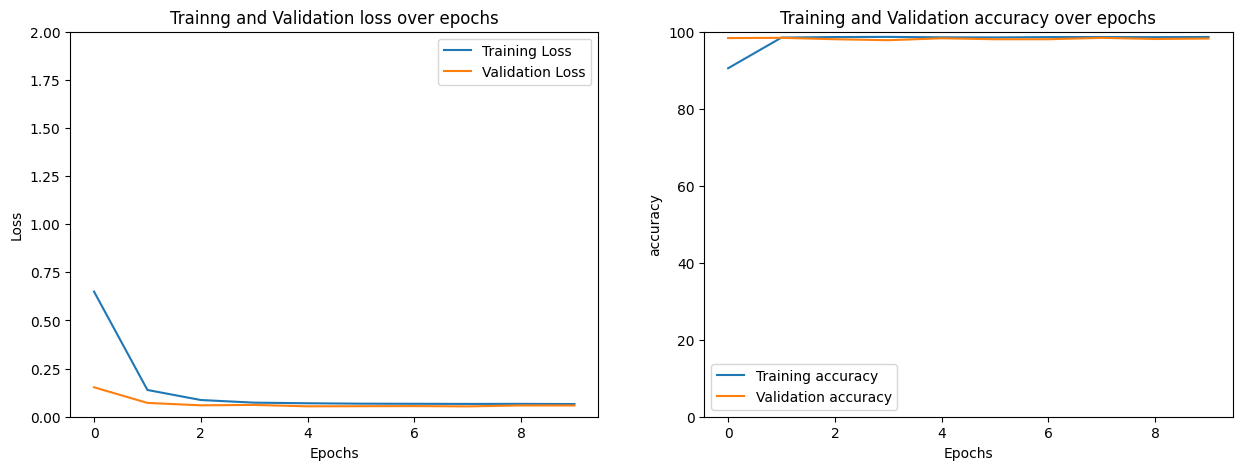

In [ ]:
fip, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axs[0].plot(total_loss_train_plot, label="Training Loss")
axs[0].plot(total_loss_validation_plot, label="Validation Loss")
axs[0].set_title("Trainng and Validation loss over epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label="Training accuracy")
axs[1].plot(total_acc_validation_plot, label="Validation accuracy") # Corrected variable name
axs[1].set_title("Training and Validation accuracy over epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("accuracy")
axs[1].set_ylim([0,100]) # Adjusted y-limit for accuracy
axs[1].legend()

plt.show()

In [ ]:
area = 2353/original_df['Area'].abs().max()
MajorAxisLength = 81/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = 42/original_df['MinorAxisLength'].abs().max()
Eccentricity = 32/original_df['Eccentricity'].abs().max()
ConvexArea = 12/original_df['ConvexArea'].abs().max()
EquivDiameter = 33/original_df['ConvexArea'].abs().max()
Extent = 98/original_df['ConvexArea'].abs().max()
Perimeter = 927/original_df['ConvexArea'].abs().max()
Roundness=  677/original_df['ConvexArea'].abs().max()
AspectRation = 24/original_df['ConvexArea'].abs().max()

my_prediction = model(torch.tensor([area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]))

In [ ]:
round(my_prediction.item())

1